### College of Computing and Informatics, Drexel University
### INFO 323: Cloud Computing and Big Data
### Due: Tuesday, June 13, 2023
---

## Final Project Report

## Project Title: Climate Change Surface Temperature Prediction

## Student(s): Vandan Patel, Steven Zhao, and Kevin Shi

#### Date: 6/8/2024
---

# Project Requirements

This final project examines the level of knowledge the students have learned from the course. The project must be done on a cloud computing platform, for example, the Apache Spark platform.

## Projects must apply cloud computing platforms and technqiues for data science problems.

#### Abstract
---
*(Briefly summarize the cloud-based project including the problem, data sets, models, evaluation, and final findings.)*

Climate change has been a looming issue for the world for over hundreds of years. While Scientists have recorded temperature changes for hundreds of years as well, it is still difficult for leaders and populations to understand the existence, and urgency of this global issue. Helping people understand the magnitude and urgency of this issue will also spur monetary and intellectual support to further tackle this issue. We plan to contribute to this goal by providing analysis and using cloud computing techniques to show changes in temperature and analyze temperature changes in the future. For this project we will be using the Climate Change: Earth Surface Temperature Data provided via Kaggle. This dataset contains data repackaged from a newer compilation put together by Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. It combines 1.6 billion temperature reports from 16 pre-existing archives into various packages and subsets. Specifically for our project we will be using the city subset of data where the temperature recordings correspond to cities around the world going back to 1700. We will be using mainly the average temperature column, and the temperature uncertainty column that tells us about the range for temperature estimates. For our analytical models we will be using a linear regression, logistic regression, and finally a neural network to predict future temperature changes for specific cities. We will evaluate our models based on model accuracy, and how well it predicts the future temperatures or categories of temperature. Our results will show that there is a continuous increase of temperature, from the period of 1900 - 2013 showing the impact of climate change over time. The change within the 2000-2013 period is steeper, however the overall temperature change between 1900 and 2013 rose slower than expected.


### 1. Introduction
---
*(Introduce the project, describe the objectives, and present the results. This section will provide an overview of the entire project including the description of the data sets and the cloud-based data analytics methods and techniques the team used for analyzing the data to address the problem. Highlight the key findings.)*

The dataset we will be using is a dataset from Kaggle called “Climate Change: Earth Surface Temperature Data”. This dataset offers an extensive compilation of global temperature records, crucial for studying climate trends and understanding the broader context of climate change. The data originates from the Berkeley Earth Surface Temperature Study and includes temperature reports spanning several centuries.
The dataset contains multiple files:
*  GlobalTemperatures.csv
*  GlobalLandTemperaturesByCountry.csv
*  GlobalLandTemperaturesByState.csv
*  GlobalLandTemperaturesByMajorCity.csv
*  GlobalLandTemperaturesByCity.csv

We will be using the GlobalLandTemperaturesByCity.csv (532.83 MB) and GlobalTemperatures.csv (205.88 kB) files for our project. We will be mostly working with the GlobalLandTemperaturesByCity.csv file, but we may join in some features that we may possibly find useful from the GlobalTemperatures.csv file.
The GlobalLandTemperaturesByCity.csv file contains land temperatures by city with the following features: date, AverageTemperature, AverageTemperatureUncertainty, City, Country, Latitude, and Longitude.


The GlobalTemperatures.csv file contains global land and ocean-and-land temperatures with the following features:

*  Date
*  LandAverageTemperature
*  LandAverageTemperatureUncertainty
*  LandMaxTemperature
*  LandMaxTemperatureUncertainty
*  LandMinTemperature
*  LandMinTemperatureUncertainty
*  LandAndOceanAverageTemperature
*  LandAndOceanAverageTemperatureUncertainty

Data Analytic Methods:
*  Data Cleaning and Data Preprocessing:
  *  Just by a first glance at our dataset, we can see missing values, so we will need to identify and handle missing data points.
  *  We may possibly have to join dataframes to get all the desired features corresponding to each of the relative records.

*  EDA:
  *  We will calculate descriptive statistics such as mean, median, standard deviation, etc.
  *  We will perform data visualization using Matplotlib and Seaborn (histograms, scatter plots, bar graphs, time series plots, etc.).
  *  We can apply correlation and statistical analysis such as linear regression.
*  Time Series Analysis/Machine Learning:
  *  Since the dataset contains dates, we can forecast future temperature trends using time series analysis.
  *  We can explore Autoregressive Integrated Moving Average (ARIMA).
  *  We can also implement a Neural Network using RNN.
  
For the cloud computing techniques that we will use, we will be leveraging the use of Spark in Databricks. We will need to ingest and upload the data to our Databricks accounts and then load the data into Spark dataframes. When performing data cleaning, EDA, time series analysis, and machine learning, we will use SparkSQL to query our data frames as temporary views to get subsets of the data we are interested in, as well as using PySpark to help further process the data. The capabilities of cloud computing will effectively allow us to digest and utilize our large amount of climate change data.




### 2. Problem Definition
---
*(Define the problem that will be solved in this cloud computing project.)*

For our project we will tackle the issue of climate change and global warming. This global issue of climate change has been a looming environmental problem for over almost two centuries starting with the advent of the industrial revolution. Scientists and researchers have been recording and analyzing temperature, and weather trends for this entire period building their case for climate change, and to influence global leaders to take action. Our project will also tackle these historical temperature changes in an effort to predict rising future temperatures, and demonstrate the changes in temperature overtime. For many people who do not consider climate change a serious issue, or do not recognize the change in temperatures over time it is necessary to have research projects similar to this to help people understand why this issue is so prevalent in our modern world.

Additionally, with the capabilities of cloud computing, we can easily digest and utilize the large historical datasets that scientists have amassed over the years. While analysis was able to be done before, cloud computing allows us to easily tackle large datasets as students with a minimal budget. We are much more enabled to tackle the coming challenges of tomorrow. Through our project's goal of predicting future temperature we can show how prevalent of an issue this really is.


### 3. Data
---
*(Describe the origin, format, and  charateristics of the data.)*

We got this data set from Kaggle.com where it was provided in a csv format. This data was gathered from Berkeley Earth which is affiliated with the Lawrence National Berkeley Laboratory. The data is a combination of 16 different pre-existing archives. The data present ranges from the year of 1750 to as late as 2013. When it comes to accessing the data it is straightforward. We plan on loading this data into a platform such as Databricks where we can open an IPYNB or Python file. We plan on using pandas dataframes to load this data and use it to complete our tasks. Along with that the data span over 3448 different cities.

### 4. Exploratory Data Analysis
---
*(Cleanse, wrangle, transform, and analyze the data. Compute descriptive statistics and visualize the values of features and correlations between different features. Explain the process and the results.)*

In [ ]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# check availability of Spark
spark.version

'3.5.0'

In [ ]:
file="/FileStore/tables/info323_final_project/GlobalLandTemperaturesByCity.csv"
weather_df = spark.read.option("inferSchema", "true").option("header", "true").csv(file)

In [ ]:
# Display the schema of the DataFrame
weather_df.printSchema()

root
 |-- dt: date (nullable = true)
 |-- AverageTemperature: double (nullable = true)
 |-- AverageTemperatureUncertainty: double (nullable = true)
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)



In [ ]:
# Show the first few rows of the DataFrame
weather_df.show(5)

+----------+------------------+-----------------------------+-----+-------+--------+---------+
|        dt|AverageTemperature|AverageTemperatureUncertainty| City|Country|Latitude|Longitude|
+----------+------------------+-----------------------------+-----+-------+--------+---------+
|1743-11-01|             6.068|           1.7369999999999999|Århus|Denmark|  57.05N|   10.33E|
|1743-12-01|              NULL|                         NULL|Århus|Denmark|  57.05N|   10.33E|
|1744-01-01|              NULL|                         NULL|Århus|Denmark|  57.05N|   10.33E|
|1744-02-01|              NULL|                         NULL|Århus|Denmark|  57.05N|   10.33E|
|1744-03-01|              NULL|                         NULL|Århus|Denmark|  57.05N|   10.33E|
+----------+------------------+-----------------------------+-----+-------+--------+---------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import col, sum as spark_sum

# Count the null values in each column
null_counts = weather_df.select([spark_sum(col(column).isNull().cast("int")).alias(column) for column in weather_df.columns])

# Show the counts of null values
null_counts.show()

+---+------------------+-----------------------------+----+-------+--------+---------+
| dt|AverageTemperature|AverageTemperatureUncertainty|City|Country|Latitude|Longitude|
+---+------------------+-----------------------------+----+-------+--------+---------+
|  0|            364130|                       364130|   0|      0|       0|        0|
+---+------------------+-----------------------------+----+-------+--------+---------+



In [ ]:
from pyspark.sql.functions import to_date, year

# Convert the "dt" column to a date type
weather_df = weather_df.withColumn("dt", to_date(col("dt")))

# Filter the DataFrame to include records from 1800 onwards
weather_df_1800_onwards = weather_df.filter(year(col("dt")) >= 1800)

# Show the schema and the first few rows of the filtered DataFrame
weather_df_1800_onwards.printSchema()
weather_df_1800_onwards.show(5)

root
 |-- dt: date (nullable = true)
 |-- AverageTemperature: double (nullable = true)
 |-- AverageTemperatureUncertainty: double (nullable = true)
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)

+----------+-------------------+-----------------------------+-----+-------+--------+---------+
|        dt| AverageTemperature|AverageTemperatureUncertainty| City|Country|Latitude|Longitude|
+----------+-------------------+-----------------------------+-----+-------+--------+---------+
|1800-01-01|             -3.167|                        2.315|Århus|Denmark|  57.05N|   10.33E|
|1800-02-01|-2.0709999999999997|                         5.42|Århus|Denmark|  57.05N|   10.33E|
|1800-03-01|              -2.32|                        4.923|Århus|Denmark|  57.05N|   10.33E|
|1800-04-01|              8.035|                        2.634|Århus|Denmark|  57.05N|   10.33E|
|1800-05-01| 12.3129999

Filter out null values

In [ ]:
from pyspark.sql.functions import to_date, year

# Convert the "dt" column to a date type
weather_df = weather_df.withColumn("dt", to_date(col("dt")))

# Filter the DataFrame to include records from 1800 onwards
weather_df_1900_onwards = weather_df.filter(year(col("dt")) >= 1900)

# Show the schema and the first few rows of the filtered DataFrame
weather_df_1900_onwards.printSchema()
weather_df_1900_onwards.show(5)

root
 |-- dt: date (nullable = true)
 |-- AverageTemperature: double (nullable = true)
 |-- AverageTemperatureUncertainty: double (nullable = true)
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)

+----------+------------------+-----------------------------+-----+-------+--------+---------+
|        dt|AverageTemperature|AverageTemperatureUncertainty| City|Country|Latitude|Longitude|
+----------+------------------+-----------------------------+-----+-------+--------+---------+
|1900-01-01|            -0.989|                        0.588|Århus|Denmark|  57.05N|   10.33E|
|1900-02-01|            -2.799|                        0.882|Århus|Denmark|  57.05N|   10.33E|
|1900-03-01|0.5919999999999999|                        0.429|Århus|Denmark|  57.05N|   10.33E|
|1900-04-01|              4.63|          0.41700000000000004|Århus|Denmark|  57.05N|   10.33E|
|1900-05-01|             9.576

Get null counts for 1800s onwards <br/>
There are a lot of null counts from 1800s onwards

In [ ]:
from pyspark.sql.functions import col, sum as spark_sum

# Count the null values in each column
null_counts_1800 = weather_df_1800_onwards.select([spark_sum(col(column).isNull().cast("int")).alias(column) for column in weather_df_1800_onwards.columns])

# Show the counts of null values
null_counts_1800.show()

+---+------------------+-----------------------------+----+-------+--------+---------+
| dt|AverageTemperature|AverageTemperatureUncertainty|City|Country|Latitude|Longitude|
+---+------------------+-----------------------------+----+-------+--------+---------+
|  0|            288526|                       288526|   0|      0|       0|        0|
+---+------------------+-----------------------------+----+-------+--------+---------+



Get null counts for 1900s onwards <br/>
There are much less null counts from 1900s onwards, so we will focus on using the weather data from 1900s onwards for the rest of the project.

In [ ]:
from pyspark.sql.functions import col, sum as spark_sum

# Count the null values in each column
null_counts_1900 = weather_df_1900_onwards.select([spark_sum(col(column).isNull().cast("int")).alias(column) for column in weather_df_1900_onwards.columns])

# Show the counts of null values
null_counts_1900.show()

+---+------------------+-----------------------------+----+-------+--------+---------+
| dt|AverageTemperature|AverageTemperatureUncertainty|City|Country|Latitude|Longitude|
+---+------------------+-----------------------------+----+-------+--------+---------+
|  0|              3070|                         3070|   0|      0|       0|        0|
+---+------------------+-----------------------------+----+-------+--------+---------+



Discovered that 2013-09-01 is the date with all the null values

In [ ]:
from pyspark.sql.functions import col

# Create a condition to check for null values in any column
null_condition = (col("AverageTemperature").isNull() |
                  col("AverageTemperatureUncertainty").isNull() |
                  col("City").isNull() |
                  col("Country").isNull() |
                  col("Latitude").isNull() |
                  col("Longitude").isNull())

# Filter the DataFrame to get rows with null values
null_dates_df = weather_df_1900_onwards.filter(null_condition)

# Select and show the dates and relevant columns with null values
null_dates_df.select("dt").distinct().show()


+----------+
|        dt|
+----------+
|2013-09-01|
+----------+



In [ ]:
# Select and show all rows with null values
null_dates_df.show()

+----------+------------------+-----------------------------+-------------+--------------+--------+---------+
|        dt|AverageTemperature|AverageTemperatureUncertainty|         City|       Country|Latitude|Longitude|
+----------+------------------+-----------------------------+-------------+--------------+--------+---------+
|2013-09-01|              NULL|                         NULL|        Århus|       Denmark|  57.05N|   10.33E|
|2013-09-01|              NULL|                         NULL|        Çorlu|        Turkey|  40.99N|   27.69E|
|2013-09-01|              NULL|                         NULL|        Çorum|        Turkey|  40.99N|   34.08E|
|2013-09-01|              NULL|                         NULL|      Öskemen|    Kazakhstan|  50.63N|   82.39E|
|2013-09-01|              NULL|                         NULL|       Ürümqi|         China|  44.20N|   87.20E|
|2013-09-01|              NULL|                         NULL|     A Coruña|         Spain|  42.59N|    8.73W|
|2013-09-0

Filter the data to get data from 1900s onwards, not including the date 2013-09-01

In [ ]:
from pyspark.sql.functions import to_date, col

# Convert the "dt" column to a date type
weather_df_1900_onwards = weather_df_1900_onwards.withColumn("dt", to_date(col("dt")))

# Filter the DataFrame to exclude records with the date 2013-09-01
weather_df_1900_onwards_filtered = weather_df_1900_onwards.filter(col("dt") != "2013-09-01")

# Show the schema and the first few rows of the filtered DataFrame
weather_df_1900_onwards_filtered.printSchema()
weather_df_1900_onwards_filtered.show(5)

root
 |-- dt: date (nullable = true)
 |-- AverageTemperature: double (nullable = true)
 |-- AverageTemperatureUncertainty: double (nullable = true)
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)

+----------+------------------+-----------------------------+-----+-------+--------+---------+
|        dt|AverageTemperature|AverageTemperatureUncertainty| City|Country|Latitude|Longitude|
+----------+------------------+-----------------------------+-----+-------+--------+---------+
|1900-01-01|            -0.989|                        0.588|Århus|Denmark|  57.05N|   10.33E|
|1900-02-01|            -2.799|                        0.882|Århus|Denmark|  57.05N|   10.33E|
|1900-03-01|0.5919999999999999|                        0.429|Århus|Denmark|  57.05N|   10.33E|
|1900-04-01|              4.63|          0.41700000000000004|Århus|Denmark|  57.05N|   10.33E|
|1900-05-01|             9.576

In [ ]:
from pyspark.sql.functions import col, sum as spark_sum

# Count the null values in each column
null_counts_1900_filtered = weather_df_1900_onwards_filtered.select([spark_sum(col(column).isNull().cast("int")).alias(column) for column in weather_df_1900_onwards_filtered.columns])

# Show the counts of null values
null_counts_1900_filtered.show()

+---+------------------+-----------------------------+----+-------+--------+---------+
| dt|AverageTemperature|AverageTemperatureUncertainty|City|Country|Latitude|Longitude|
+---+------------------+-----------------------------+----+-------+--------+---------+
|  0|                 0|                            0|   0|      0|       0|        0|
+---+------------------+-----------------------------+----+-------+--------+---------+



In [ ]:
# Count the number of rows in the DataFrame
row_count = weather_df_1900_onwards_filtered.count()

# Display the row count
print(f"Number of rows in weather_df_1900_onwards_filtered: {row_count}")

Number of rows in weather_df_1900_onwards_filtered: 4787640


Print out some information on unique cities, countries, and dates

In [ ]:
# Print the unique cities
unique_cities = weather_df_1900_onwards_filtered.select("City").distinct()
print("Unique Cities:")
unique_cities.show(truncate=False)

# Print the unique countries
unique_countries = weather_df_1900_onwards_filtered.select("Country").distinct()
print("Unique Countries:")
unique_countries.show(truncate=False)

# Print the unique dates
unique_dates = weather_df_1900_onwards_filtered.select("dt").distinct()
print("Unique Dates:")
unique_dates.show(truncate=False)

Unique Cities:
+----------+
|City      |
+----------+
|Århus     |
|Abohar    |
|Abha      |
|Çorum     |
|Abeokuta  |
|Abengourou|
|Abakan    |
|Abadan    |
|Abidjan   |
|Aberdeen  |
|Aba       |
|Abiko     |
|Abakaliki |
|Aachen    |
|Öskemen   |
|Abbotsford|
|Çorlu     |
|Ürümqi    |
|A Coruña  |
|Abilene   |
+----------+
only showing top 20 rows

Unique Countries:
+--------------------+
|Country             |
+--------------------+
|Russia              |
|Turkey              |
|Germany             |
|Ghana               |
|Benin               |
|China               |
|United States       |
|India               |
|Nigeria             |
|Spain               |
|Denmark             |
|Iran                |
|Venezuela           |
|Mexico              |
|Côte D'Ivoire       |
|Saudi Arabia        |
|United Arab Emirates|
|Canada              |
|Japan               |
|Kazakhstan          |
+--------------------+
only showing top 20 rows

Unique Dates:
+----------+
|dt        |
+----------

Create a temporary view from the dataframe for querying

In [ ]:
# Create a temporary view from the DataFrame
weather_df_1900_onwards_filtered.createOrReplaceTempView("weather_view")

In [ ]:
# Query to rank cities by highest average temperature
sql_query1 = spark.sql("""
SELECT City, AVG(AverageTemperature) AS AvgTemperature
FROM weather_view
GROUP BY City
ORDER BY AvgTemperature desc
""")

In [ ]:
print("Rank cities by highest average temperature")
sql_query1.show()

Rank cities by highest average temperature
+-------------+------------------+
|         City|    AvgTemperature|
+-------------+------------------+
|       Niamey|29.236066715542524|
|       Jibuti|29.216931085043992|
|     Khartoum| 29.21363343108506|
|   Umm Durman| 29.21363343108506|
|      Kassala|29.053351173020555|
|        Mopti|28.970884164222852|
|        Kusti|28.697781524926658|
|        Rabak|28.697781524926658|
|       Madras|28.687593841642233|
|  Kanchipuram|28.687593841642233|
|        Avadi|28.687593841642233|
|     Ambattur|28.687593841642233|
|      Alandur|28.687593841642233|
|   Pallavaram|28.687593841642233|
|     Tambaram|28.687593841642233|
| Tiruvottiyur|28.687593841642233|
|     Tirupati|28.687593841642233|
|Machilipatnam|28.497189882697878|
|       Ongole|28.497189882697878|
|   Punto Fijo|28.459696480938458|
+-------------+------------------+
only showing top 20 rows



In [ ]:
# Query to rank cities by lowest average temperature
sql_query2 = spark.sql("""
SELECT City, AVG(AverageTemperature) AS AvgTemperature
FROM weather_view
GROUP BY City
ORDER BY AvgTemperature
""")

In [ ]:
print("Rank cities by lowest average temperature")
sql_query2.show()

Rank cities by lowest average temperature
+-------------------+-------------------+
|               City|     AvgTemperature|
+-------------------+-------------------+
|            Norilsk|-11.499814516129046|
|              Kyzyl| -5.906884164222863|
|              Chita| -4.022477272727275|
|         Ust Ilimsk| -3.678753665689156|
|       Nefteyugansk|-3.1181686217008755|
|             Surgut|-3.1181686217008755|
|        Ulaanbaatar| -3.054462609970678|
|           Ulan Ude|  -2.86200293255132|
|             Bratsk|  -2.50201099706745|
|             Hailar| -2.175846774193548|
|            Yakeshi| -2.175846774193548|
|Komsomolsk Na Amure|-2.1407045454545495|
|          Anchorage|-1.9861422287390011|
|     Nizhnevartovsk|-1.9443709677419367|
|            Angarsk|-1.5042016129032287|
|            Irkutsk|-1.5042016129032287|
|              Kansk|-1.4512587976539582|
|           Murmansk|-1.2980337243401738|
|        Krasnoyarsk|-1.2942419354838726|
|              Ukhta| -1.217604838

In [ ]:
# Query to rank countries by highest average temperature
sql_query3 = spark.sql("""
SELECT Country, AVG(AverageTemperature) AS AvgTemperature
FROM weather_view
GROUP BY Country
ORDER BY AvgTemperature desc
""")

In [ ]:
print("Rank countries by highest average temperature")
sql_query3.show()

Rank countries by highest average temperature
+--------------------+------------------+
|             Country|    AvgTemperature|
+--------------------+------------------+
|            Djibouti|29.216931085043992|
|               Niger|28.301931818181835|
|               Sudan| 28.18150029325512|
|        Burkina Faso|28.022024926686196|
|                Mali|27.784609970674456|
|                Chad|27.334237536656865|
|       Guinea Bissau|27.232560117302068|
|          Mauritania| 27.17101832844577|
|               Benin| 27.16482820136852|
|            Cambodia|27.144947947214053|
|           Nicaragua| 27.05238489736069|
|               Qatar| 27.04608797653959|
|           Sri Lanka| 26.99283740632129|
|            Thailand|26.968688975003495|
|              Panama| 26.93278005865103|
|                Togo| 26.83797104105573|
|              Guyana|26.765002932551305|
|             Nigeria|26.755594413650954|
|           Singapore|26.752522727272737|
|United Arab Emirates| 26.7339

In [ ]:
# Query to rank countries by lowest average temperature
sql_query4 = spark.sql("""
SELECT Country, AVG(AverageTemperature) AS AvgTemperature
FROM weather_view
GROUP BY Country
ORDER BY AvgTemperature
""")

In [ ]:
print("Rank countries by lowest average temperature")
sql_query4.show()

Rank countries by lowest average temperature
+--------------+------------------+
|       Country|    AvgTemperature|
+--------------+------------------+
|      Mongolia|-3.054462609970678|
|       Iceland|1.8676884164222858|
|        Russia|3.4891641993758977|
|        Norway| 3.943379398826981|
|       Finland| 4.112403372434021|
|    Kazakhstan| 4.677701026392956|
|       Estonia| 5.082861436950146|
|        Canada|  5.29437184750733|
|        Latvia| 5.745191715542523|
|        Sweden|6.0112164222873865|
|     Lithuania| 6.451101026392966|
|       Belarus| 6.471910373900291|
|       Austria| 6.574826099706745|
|   Switzerland| 7.830996187683281|
|        Poland| 7.984515164377214|
|       Denmark| 8.126762096774188|
|       Ukraine| 8.154683681573795|
|Czech Republic| 8.377221554252197|
|       Armenia| 8.719329178885634|
|       Georgia| 8.719329178885637|
+--------------+------------------+
only showing top 20 rows



Show descriptive statistics

In [ ]:
# Compute descriptive statistics
descriptive_stats = weather_df_1900_onwards_filtered.describe()
descriptive_stats.show()

+-------+------------------+-----------------------------+--------+-----------+--------+---------+
|summary|AverageTemperature|AverageTemperatureUncertainty|    City|    Country|Latitude|Longitude|
+-------+------------------+-----------------------------+--------+-----------+--------+---------+
|  count|           4787640|                      4787640| 4787640|    4787640| 4787640|  4787640|
|   mean| 17.82857353560425|          0.44324423891521597|    NULL|       NULL|    NULL|     NULL|
| stddev|10.033852013634304|          0.27124707415607585|    NULL|       NULL|    NULL|     NULL|
|    min|-42.70399999999999|                        0.034|A Coruña|Afghanistan|   0.80N|    0.00W|
|    max| 39.15600000000001|                        7.568|  Ürümqi|   Zimbabwe|   8.84S|   99.91E|
+-------+------------------+-----------------------------+--------+-----------+--------+---------+



Perform Data Visualization

In [ ]:
import pandas as pd

# Convert to Pandas DataFrame for visualization
weather_pandas_df = weather_df_1900_onwards_filtered.toPandas()

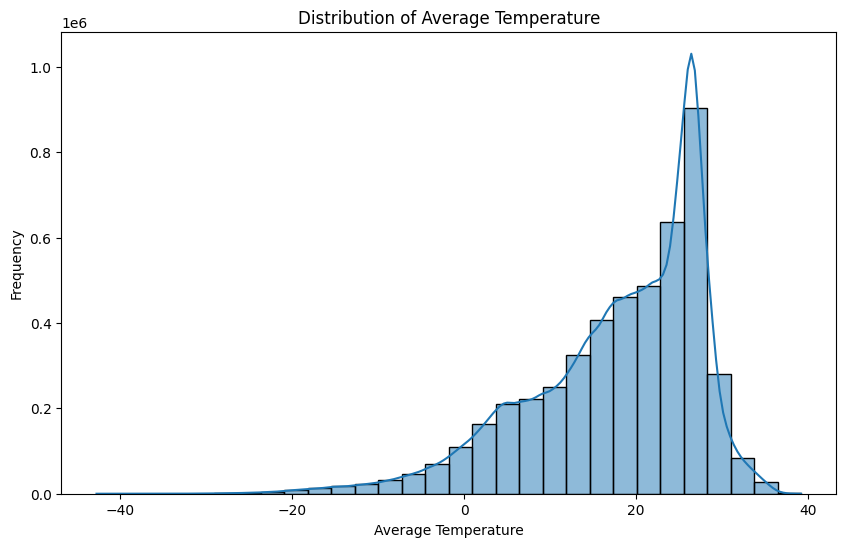

In [ ]:
# Plot histogram for AverageTemperature
plt.figure(figsize=(10, 6))
sns.histplot(weather_pandas_df["AverageTemperature"].dropna(), bins=30, kde=True)
plt.title("Distribution of Average Temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.show()

This histogram represents the distribution of temperatures across our entire dataset from 1900-2013

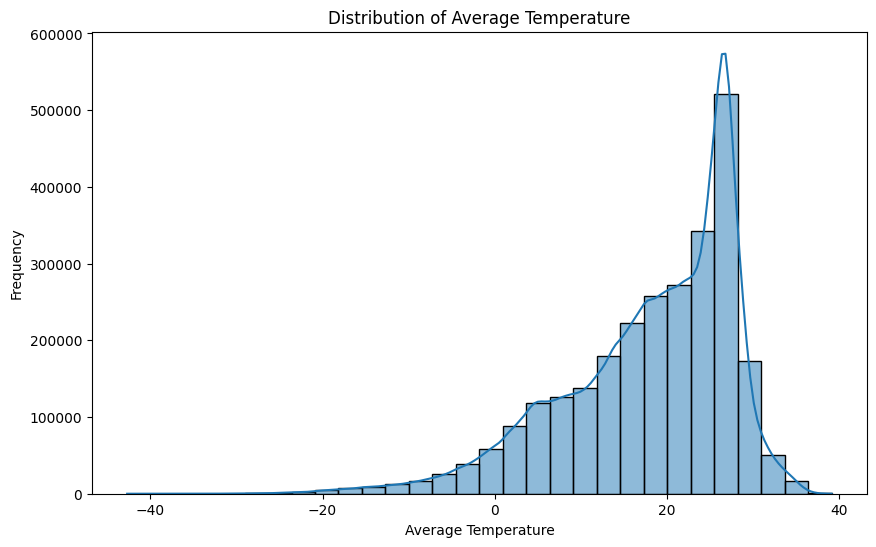

In [ ]:
from pyspark.sql.functions import year

# Filter the DataFrame to include records from 1950 onwards
weather_df_1950_onwards_filtered = weather_df_1900_onwards_filtered.filter(year(col("dt")) >= 1950)

# Convert Spark DataFrame to Pandas DataFrame
weather_pandas_df_1950_onwards = weather_df_1950_onwards_filtered.select("AverageTemperature").toPandas()

# Plot histogram for AverageTemperature from 1950 onwards
plt.figure(figsize=(10, 6))
sns.histplot(weather_pandas_df_1950_onwards["AverageTemperature"].dropna(), bins=30, kde=True)
plt.title("Distribution of Average Temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.show()

This dataset represents the distribution of temperatures from 1950 - 2013

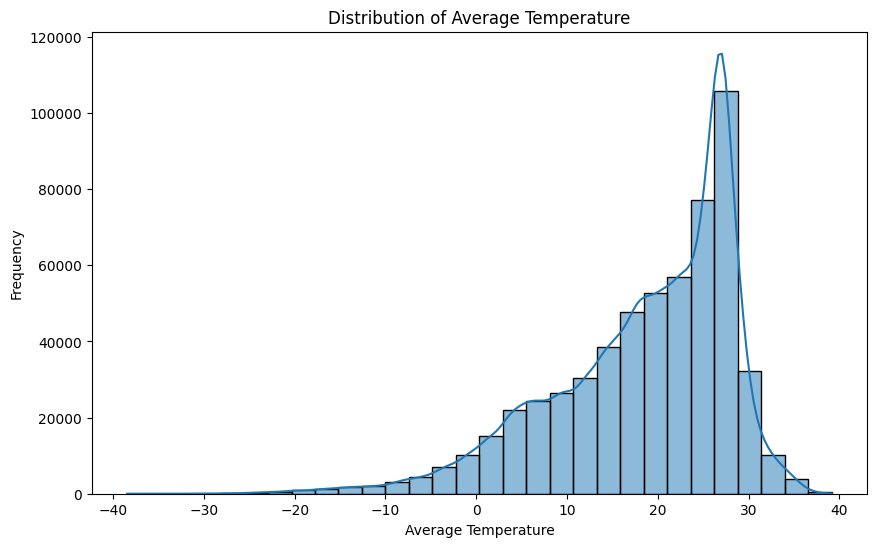

In [ ]:
from pyspark.sql.functions import year

# Filter the DataFrame to include records from 2000 onwards
weather_df_2000_onwards_filtered = weather_df_1900_onwards_filtered.filter(year(col("dt")) >= 2000)

# Convert Spark DataFrame to Pandas DataFrame
weather_pandas_df_2000_onwards = weather_df_2000_onwards_filtered.select("AverageTemperature").toPandas()

# Plot histogram for AverageTemperature from 2000 onwards
plt.figure(figsize=(10, 6))
sns.histplot(weather_pandas_df_2000_onwards["AverageTemperature"].dropna(), bins=30, kde=True)
plt.title("Distribution of Average Temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.show()

This is the distribution of average temperatures from 2000 - 2013

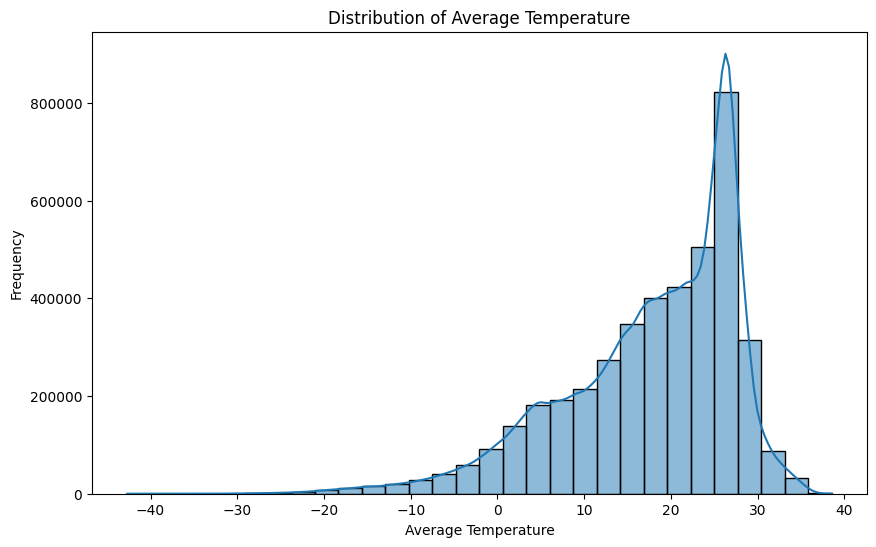

In [ ]:
from pyspark.sql.functions import year

# Filter the DataFrame to include records from 2000 onwards
weather_df_1900_to_2000_filtered = weather_df_1900_onwards_filtered.filter(year(col("dt")) < 2000)

# Convert Spark DataFrame to Pandas DataFrame
weather_pandas_df_1900_to_2000 = weather_df_1900_to_2000_filtered.select("AverageTemperature").toPandas()

# Plot histogram for AverageTemperature from 2000 onwards
plt.figure(figsize=(10, 6))
sns.histplot(weather_pandas_df_1900_to_2000["AverageTemperature"].dropna(), bins=30, kde=True)
plt.title("Distribution of Average Temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.show()

This is the distribution of average temperatures from 1900 - 2000

From all of the histograms we can see the the distribution is very similar across this time period, however we do have increases in the higher temperature bins as we get closer to the latest date

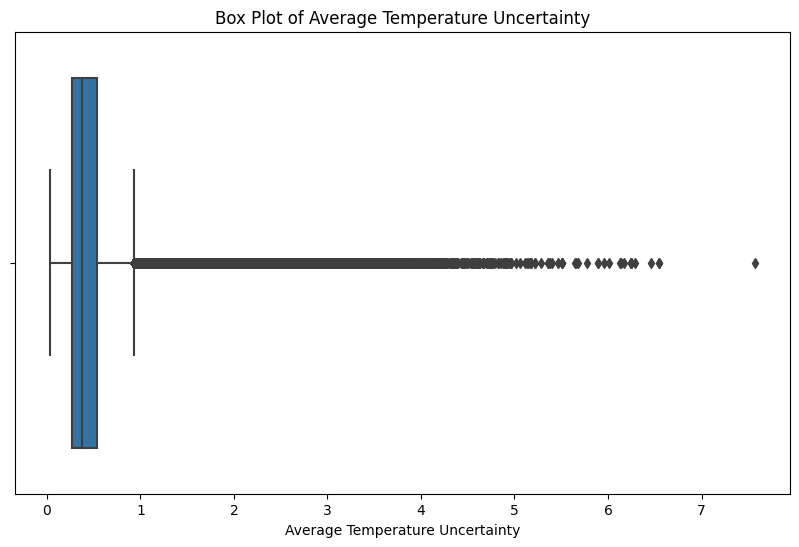

In [ ]:
# Plot box plot for AverageTemperatureUncertainty
plt.figure(figsize=(10, 6))
sns.boxplot(x=weather_pandas_df["AverageTemperatureUncertainty"].dropna())
plt.title("Box Plot of Average Temperature Uncertainty")
plt.xlabel("Average Temperature Uncertainty")
plt.show()

This boxplot visualizes the average temperature uncertainty, which tells us the range that our temperature estimates could be from.

In [ ]:
# Compute correlation matrix
correlation_matrix = weather_df_1900_onwards_filtered.select(
    col("AverageTemperature"), col("AverageTemperatureUncertainty")
).toPandas().corr()

# Display correlation matrix
print(correlation_matrix)

                               AverageTemperature  AverageTemperatureUncertainty
AverageTemperature                        1.00000                       -0.02625
AverageTemperatureUncertainty            -0.02625                        1.00000


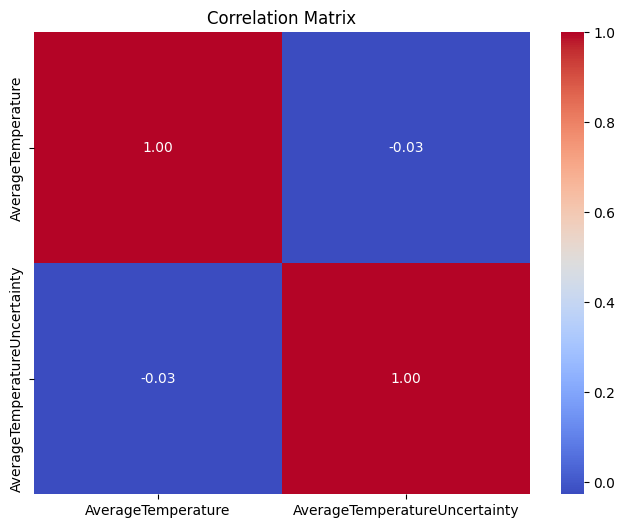

In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

This correlatoin matrix visualizes the correlation between features in our dataset

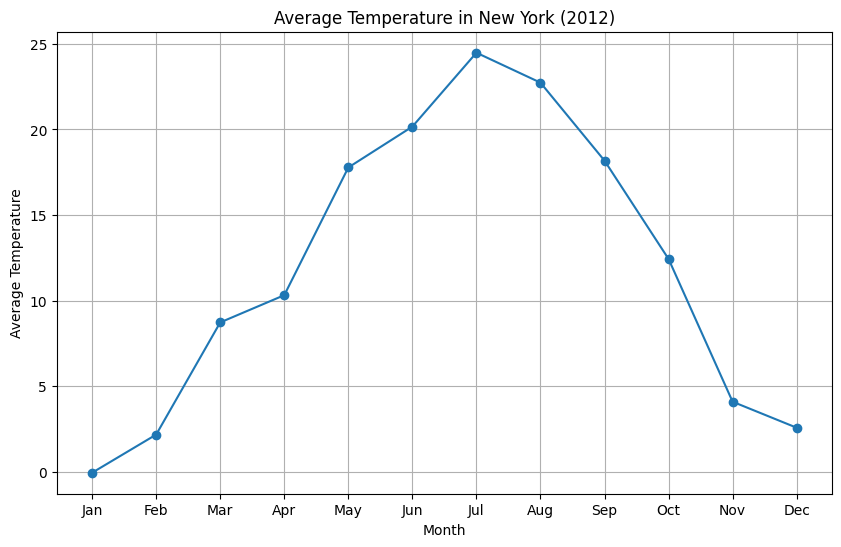

In [ ]:
from pyspark.sql.functions import year, month, dayofmonth
import matplotlib.pyplot as plt

# Filter the DataFrame for New York and the year 2013
new_york_2012_df = weather_df_1900_onwards_filtered.filter((col("City") == "New York") &
                                                            (year(col("dt")) == 2012))

# Extract month and average temperature columns
new_york_2012_monthly_avg_temp = new_york_2012_df.select(month("dt").alias("Month"),
                                                         "AverageTemperature").toPandas()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(new_york_2012_monthly_avg_temp["Month"],
         new_york_2012_monthly_avg_temp["AverageTemperature"],
         marker='o', linestyle='-')
plt.title("Average Temperature in New York (2012)")
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

This chart represents the temperature trends in NYC for the year 2013. We will use this to compare temperature trends.

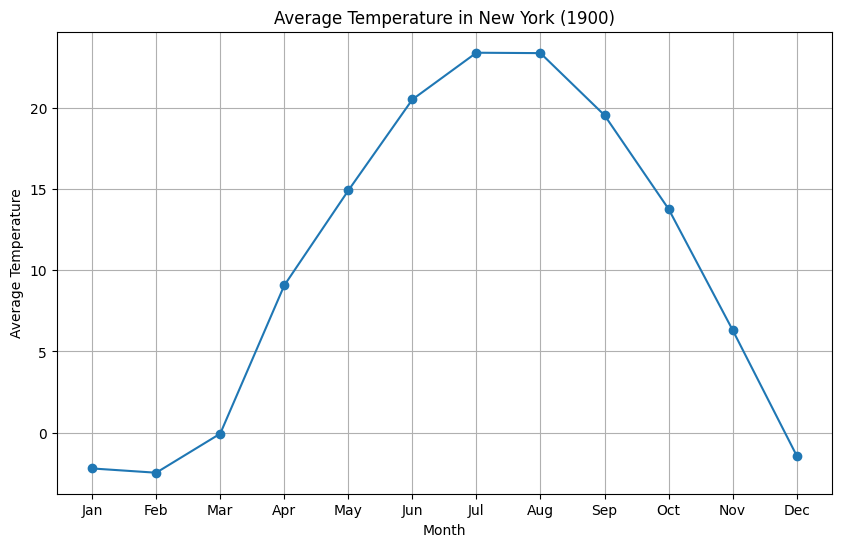

In [ ]:
from pyspark.sql.functions import year, month, dayofmonth
import matplotlib.pyplot as plt

# Filter the DataFrame for New York and the year 2013
new_york_1900_df = weather_df_1900_onwards_filtered.filter((col("City") == "New York") &
                                                            (year(col("dt")) == 1900))

# Extract month and average temperature columns
new_york_1900_monthly_avg_temp = new_york_1900_df.select(month("dt").alias("Month"),
                                                         "AverageTemperature").toPandas()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(new_york_1900_monthly_avg_temp["Month"],
         new_york_1900_monthly_avg_temp["AverageTemperature"],
         marker='o', linestyle='-')
plt.title("Average Temperature in New York (1900)")
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

Following the last visualization, we have the temperature trends for the year 1900. We can see that while the temperature changes follow the same seasonal trends, we have more erratic change in temperature in more recent years compared with past years where the temperature rises and falls gradually

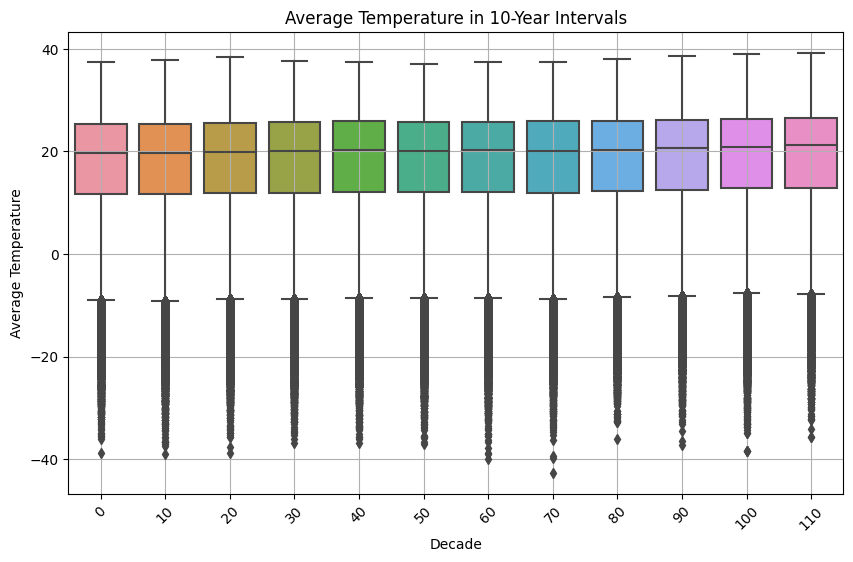

In [ ]:
from pyspark.sql.functions import floor

# Extract the year from the date column
weather_df_1900_onwards_filtered = weather_df_1900_onwards_filtered.withColumn("Year", year("dt"))

# Group the data into 10-year intervals
weather_df_10_year_intervals = weather_df_1900_onwards_filtered.withColumn("Decade", floor((col("Year") - 1900) / 10) * 10)

# Convert Spark DataFrame to Pandas DataFrame
weather_pandas_df_10_year_intervals = weather_df_10_year_intervals.select("Decade", "AverageTemperature").toPandas()

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Decade", y="AverageTemperature", data=weather_pandas_df_10_year_intervals)
plt.title("Average Temperature in 10-Year Intervals")
plt.xlabel("Decade")
plt.ylabel("Average Temperature")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Box plot showing the average temperature over 10 year intervals from 1900 - 2013. We can see from the middle line a slow upward trend in the average temperature.

/root/.ipykernel/1137/command-1600886182919471-4261446084:50: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Temperature (°C)', alpha=0.7)


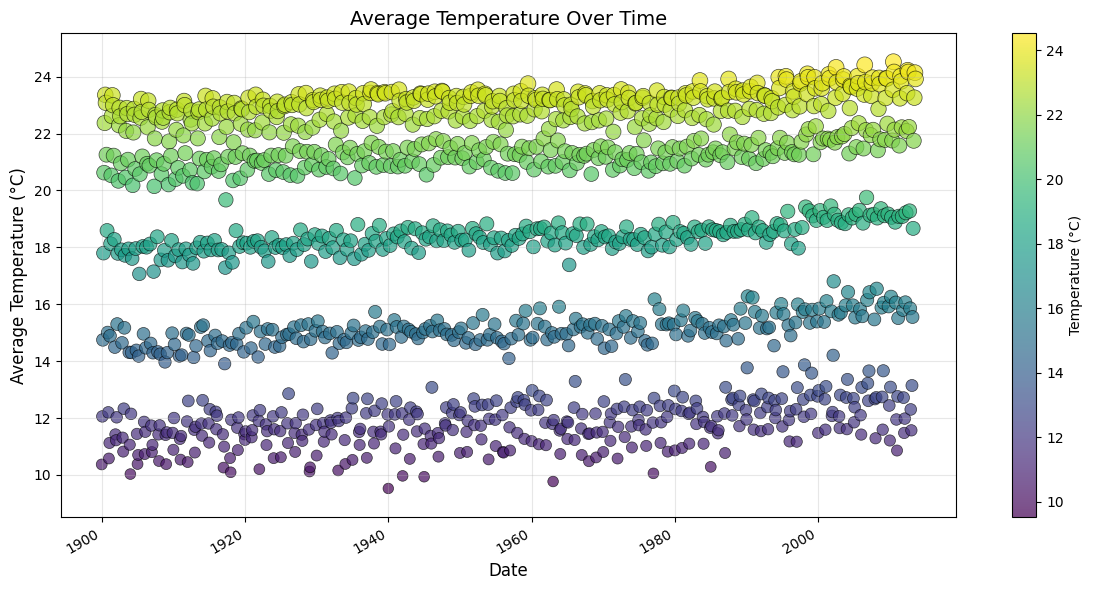

In [ ]:
import matplotlib.dates as mdates

# Convert the 'dt' column to datetime type
weather_pandas_df['dt'] = pd.to_datetime(weather_pandas_df['dt'])

# Group by date and calculate the mean temperature for each day
daily_temp = weather_pandas_df.groupby('dt')['AverageTemperature'].mean().reset_index()

# Sort by date to ensure chronological order
daily_temp = daily_temp.sort_values('dt')

# Create a scatter plot
plt.figure(figsize=(12, 6))

# Use temperature values to determine color and size
colors = plt.cm.viridis(np.interp(daily_temp['AverageTemperature'], (daily_temp['AverageTemperature'].min(), daily_temp['AverageTemperature'].max()), (0, 1)))
sizes = daily_temp['AverageTemperature'] * 5 + 10  # Adjust size for better visibility

# Create the scatter plot
plt.scatter(daily_temp['dt'], daily_temp['AverageTemperature'],
           alpha=0.7, color=colors, s=sizes, edgecolor='black', linewidth=0.5)

# Set labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.title('Average Temperature Over Time', fontsize=14)

# Improve x-axis readability
plt.gcf().autofmt_xdate()  # Rotate and align the x-axis labels

# Use matplotlib.dates for better date handling
years = mdates.YearLocator(20)  # Adjusted to every 20 years for a wider range
yearsFmt = mdates.DateFormatter('%Y')

# Set the x-axis to show every 20 years
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)

# Add grid for better readability
plt.grid(axis='both', alpha=0.3)

# Set y-axis limits to something sensible (adjust based on your data)
y_min, y_max = daily_temp['AverageTemperature'].min() - 1, daily_temp['AverageTemperature'].max() + 1
plt.ylim(y_min, y_max)

# Add a color bar
norm = plt.Normalize(daily_temp['AverageTemperature'].min(), daily_temp['AverageTemperature'].max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Temperature (°C)', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

For this chart we are attempting the visualize the temperature trends and changes from 1900 - 2013. We are able to show changes in temperature clustered by the seasonal temperature categories. The color helps us visualize the different temperature sections, and we can see that there is a slow upward trend

### 5. Modeling and Evaluation
---
*(Build analytic models and evaluate the models on the data. The analytics should be guided by the problem defined earlier. Explain the process and results.)*

#### Model #1: Linear Regression (for New York)

In [ ]:
from pyspark.sql.functions import lag, col
from pyspark.sql.window import Window
from pyspark.ml.regression import LinearRegression
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler


# FILTER Data for New York

city_data = weather_df_1900_onwards_filtered.filter(col('City') == "New York")

# Calculate the lagged values to use as features
windowSpec = Window.orderBy("dt")
city_data = city_data.withColumn("lag_temp", lag("AverageTemperature", 1).over(windowSpec))

# Drop rows with null values
city_data = city_data.dropna()

# Create features and label columns
features_col = ["lag_temp"]
label_col = "AverageTemperature"

# Split the data into training and testing sets
train_data, test_data = city_data.randomSplit([0.8, 0.2], seed=123)




# Create a VectorAssembler to assemble features into a single vector column
assembler = VectorAssembler(inputCols=features_col, outputCol="features")
city_data = assembler.transform(city_data)

# Now, you can use the name of the output column ("features") as the featuresCol
features_col = "features"

# Split the data into training and testing sets
train_data, test_data = city_data.randomSplit([0.8, 0.2], seed=123)

# Create a Linear Regression model
lr = LinearRegression(featuresCol=features_col, labelCol=label_col)

# Fit the model on the training data
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Print the Stats
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

print("Root Mean Squared Error (RMSE): ", lr_model.summary.rootMeanSquaredError)
print("R-squared (R²): ", lr_model.summary.r2)
print("Explained Variance: ",lr_model.summary.explainedVariance)
print("Mean Absolute Error: ",lr_model.summary.meanAbsoluteError)

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Coefficients: [0.8435674677326289]
Intercept: 1.6555466174656248
Root Mean Squared Error (RMSE):  4.888993370433732
R-squared (R²):  0.7097530105622608
Explained Variance:  58.449179139163576
Mean Absolute Error:  4.253174623654268


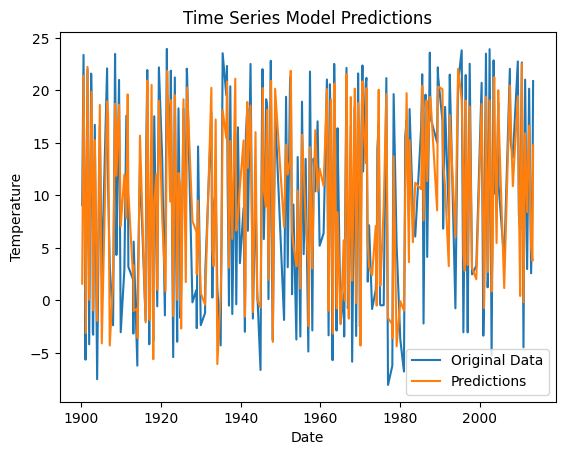

In [ ]:
# Plot the original time series data and the model's predictions for New York City
predictions_pd = predictions.toPandas()
plt.plot(predictions_pd['dt'], predictions_pd['AverageTemperature'], label='Original Data')
plt.plot(predictions_pd['dt'], predictions_pd['prediction'], label='Predictions')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series Model Predictions')
plt.legend()
plt.show()

Results:

Based on the visulaizaiton we noticed that the model worked well in prediciting. Th issue was that you can visibily see that some values were more off then others but over all it did good. To fix this we can definitely do further tuning to get the predictions as close we can to the original.
RMSE is the square root of the MSE, in this case was 4.888993370433732 which shows which good but could be better.
MAE measures the average absolute difference between actual and predicted values. In this case, the results showed that it was 4.253174623654268.
An R squared value of 0.7097 indicates that around 70.97% of the variance in the temperature data is explained by the model.
Overall, the low values of RMSE, MAE, and the high R squared suggests that the model performs well in predicting temperature trends in baghdad.

#### Model #2: Linear Regression (for Baghdad)

In [ ]:
from pyspark.sql.functions import lag, col
from pyspark.sql.window import Window
from pyspark.ml.regression import LinearRegression
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler


# FILTER Data for Baghdad

city_data_bag = weather_df_1900_onwards_filtered.filter(col('City') == "Baghdad")

# Calculate the lagged values to use as features
windowSpec = Window.orderBy("dt")
city_data_bag = city_data_bag.withColumn("lag_temp", lag("AverageTemperature", 1).over(windowSpec))

# Drop rows with null values
city_data_bag = city_data_bag.dropna()

# Create features and label columns
features_col = ["lag_temp"]
label_col = "AverageTemperature"

# Split the data into training and testing sets
train_data, test_data = city_data_bag.randomSplit([0.8, 0.2], seed=123)




# Create a VectorAssembler to assemble features into a single vector column
assembler = VectorAssembler(inputCols=features_col, outputCol="features")
city_data_bag = assembler.transform(city_data_bag)

# Now, you can use the name of the output column ("features") as the featuresCol
features_col = "features"

# Split the data into training and testing sets
train_data, test_data = city_data_bag.randomSplit([0.8, 0.2], seed=123)

# Create a Linear Regression model
lr = LinearRegression(featuresCol=features_col, labelCol=label_col)

# Fit the model on the training data
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Print the Stats
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

print("Root Mean Squared Error (RMSE): ", lr_model.summary.rootMeanSquaredError)
print("R-squared (R²): ", lr_model.summary.r2)
print("Explained Variance: ",lr_model.summary.explainedVariance)
print("Mean Absolute Error: ",lr_model.summary.meanAbsoluteError)

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Coefficients: [0.8519074610193448]
Intercept: 3.4278432882193517
Root Mean Squared Error (RMSE):  4.815388314113633
R-squared (R²):  0.7242944577182244
Explained Variance:  60.91612855484345
Mean Absolute Error:  4.175415085387747


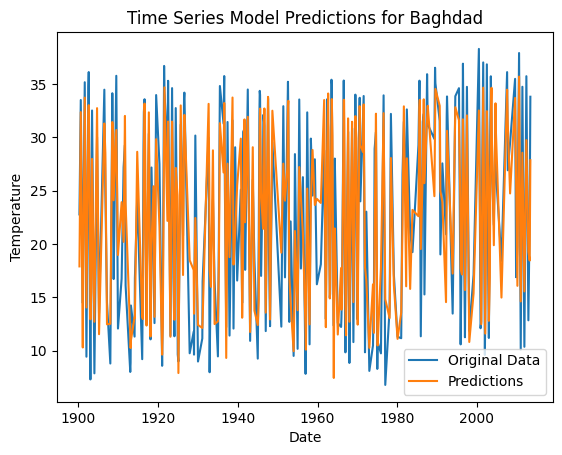

In [ ]:
# Plot the original time series data and the model's predictions for New York City
predictions_pd = predictions.toPandas()
plt.plot(predictions_pd['dt'], predictions_pd['AverageTemperature'], label='Original Data')
plt.plot(predictions_pd['dt'], predictions_pd['prediction'], label='Predictions')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series Model Predictions for Baghdad')
plt.legend()
plt.show()

Results:

Based on the visulaizaiton we noticed that the model worked well in prediciting. Th issue was that you can visibily see that some values were more off then others but over all it did good. To fix this we can definitely do further tuning to get the predictions as close we can to the original.
RMSE is the square root of the MSE, in this case was 4.815388314113633 which shows which good but could be better.
MAE measures the average absolute difference between actual and predicted values. In this case, the results showed that it was 4.175415085387747.
An R squared value of 0.72indicates that around 72% of the variance in the temperature data is explained by the model.
Overall, the low values of RMSE, MAE, and the high R squared suggests that the model performs well in predicting temperature trends in baghdad.

#### Model #3: Logistic Regression

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lag, year, month, dayofmonth
from pyspark.sql.window import Window
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import Row

# Initialize Spark session
spark = SparkSession.builder.appName("ClimateChangeLogisticRegression").getOrCreate()

# Assume weather_df_1900_onwards_filtered is already loaded as a DataFrame
weather_df = weather_df_1900_onwards_filtered

# Define a window for lag function
window_spec = Window.partitionBy("city").orderBy("dt")

# Create a column for next month's temperature
weather_df = weather_df.withColumn("next_month_temp", lag(col("AverageTemperature"), -1).over(window_spec))

# Filter out rows where next_month_temp is null (last month of each city)
weather_df = weather_df.filter(col("next_month_temp").isNotNull())

# Create a label column: 1 if next month's temperature is greater, else 0
weather_df = weather_df.withColumn("label", (col("next_month_temp") > col("AverageTemperature")).cast("integer"))

# Extract numerical features from dt column
weather_df = weather_df.withColumn("year", year(col("dt")))
weather_df = weather_df.withColumn("month", month(col("dt")))
weather_df = weather_df.withColumn("day", dayofmonth(col("dt")))

# Select relevant features and the label
feature_columns = ["AverageTemperature", "year", "month", "day"]  # Add more features as needed

# Assemble features into a feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
weather_df = assembler.transform(weather_df)

# Specify a specific city for prediction
#specific_city = "Your_City_Name"
weather_df_specific_city = weather_df.filter(col('City') == "New York")


# Split the data into training and testing sets
train_df_specific_city, test_df_specific_city = weather_df_specific_city.randomSplit([0.8, 0.2], seed=12345)

# Initialize Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="label")

# Train the model
lr_model_specific_city = lr.fit(train_df_specific_city)

# Make predictions on the test data
predictions_specific_city = lr_model_specific_city.transform(test_df_specific_city)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="label")
accuracy_specific_city = evaluator.evaluate(predictions_specific_city)
print(f"Test Accuracy for New York: {accuracy_specific_city}")

# Identify the latest date in the dataset
#latest_date = weather_df_specific_city.select("dt").orderBy(col("dt").desc()).first()["dt"]
latest_date = weather_df_specific_city.select("dt").orderBy(col("dt").desc()).first()["dt"]
print(f"Last date used for New York: {latest_date}")

# Get the row corresponding to the latest date
latest_data_row_specific_city = weather_df_specific_city.filter(col("dt") == latest_date).first()

# Extract relevant features from the latest data row
latest_data_specific_city = Row(
    AverageTemperature=latest_data_row_specific_city["AverageTemperature"],
    year=latest_data_row_specific_city["year"],
    month=latest_data_row_specific_city["month"],
    day=latest_data_row_specific_city["day"]
)

# Create a DataFrame with the latest data row
latest_data_df_specific_city = spark.createDataFrame([latest_data_specific_city])

# Assemble features into a feature vector
latest_data_df_specific_city = assembler.transform(latest_data_df_specific_city)

# Make predictions for the latest data
latest_predictions_specific_city = lr_model_specific_city.transform(latest_data_df_specific_city)

# Show the prediction
latest_predictions_specific_city.select("prediction", "probability").show()


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Test Accuracy for New York: 0.943764967499145
Last date used for New York: 2013-07-01
+----------+--------------------+
|prediction|         probability|
+----------+--------------------+
|       0.0|[0.60130804321519...|
+----------+--------------------+



In [ ]:
from pyspark.sql.functions import col

# Filter the DataFrame for New York for 2013-07-01
temperature_new_york_20130701 = weather_df_1900_onwards_filtered.filter((col("City") == "New York") & (col("dt") == "2013-07-01"))

# Filter the DataFrame for New York for 2013-08-01
temperature_new_york_20130801 = weather_df_1900_onwards_filtered.filter((col("City") == "New York") & (col("dt") == "2013-08-01"))

# Get the temperature value
temperature_value_20130701 = temperature_new_york_20130701.select("AverageTemperature").collect()[0][0]
temperature_value_20130801 = temperature_new_york_20130801.select("AverageTemperature").collect()[0][0]

print(f"The temperature in New York on 2013-07-01 was: {temperature_value_20130701}")
print(f"The temperature in New York on 2013-08-01 was: {temperature_value_20130801}")

The temperature in New York on 2013-07-01 was: 24.721999999999998
The temperature in New York on 2013-08-01 was: 21.000999999999998


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lag, year, month, dayofmonth
from pyspark.sql.window import Window
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import Row

# Initialize Spark session
spark = SparkSession.builder.appName("ClimateChangeLogisticRegression").getOrCreate()

# Assume weather_df_1900_onwards_filtered is already loaded as a DataFrame
weather_df = weather_df_1900_onwards_filtered

# Define a window for lag function
window_spec = Window.partitionBy("city").orderBy("dt")

# Create a column for next month's temperature
weather_df = weather_df.withColumn("next_month_temp", lag(col("AverageTemperature"), -1).over(window_spec))

# Filter out rows where next_month_temp is null (last month of each city)
weather_df = weather_df.filter(col("next_month_temp").isNotNull())

# Create a label column: 1 if next month's temperature is greater, else 0
weather_df = weather_df.withColumn("label", (col("next_month_temp") > col("AverageTemperature")).cast("integer"))

# Extract numerical features from dt column
weather_df = weather_df.withColumn("year", year(col("dt")))
weather_df = weather_df.withColumn("month", month(col("dt")))
weather_df = weather_df.withColumn("day", dayofmonth(col("dt")))

# Select relevant features and the label
feature_columns = ["AverageTemperature", "year", "month", "day"]  # Add more features as needed

# Assemble features into a feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
weather_df = assembler.transform(weather_df)

# Specify a specific city for prediction
#specific_city = "Your_City_Name"
weather_df_specific_city = weather_df.filter(col('City') == "Paris")


# Split the data into training and testing sets
train_df_specific_city, test_df_specific_city = weather_df_specific_city.randomSplit([0.8, 0.2], seed=12345)

# Initialize Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="label")

# Train the model
lr_model_specific_city = lr.fit(train_df_specific_city)

# Make predictions on the test data
predictions_specific_city = lr_model_specific_city.transform(test_df_specific_city)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="label")
accuracy_specific_city = evaluator.evaluate(predictions_specific_city)
print(f"Test Accuracy for Paris: {accuracy_specific_city}")

# Identify the latest date in the dataset
#latest_date = weather_df_specific_city.select("dt").orderBy(col("dt").desc()).first()["dt"]
latest_date = weather_df_specific_city.select("dt").orderBy(col("dt").desc()).first()["dt"]
print(f"Last date used for Paris: {latest_date}")

# Get the row corresponding to the latest date
latest_data_row_specific_city = weather_df_specific_city.filter(col("dt") == latest_date).first()

# Extract relevant features from the latest data row
latest_data_specific_city = Row(
    AverageTemperature=latest_data_row_specific_city["AverageTemperature"],
    year=latest_data_row_specific_city["year"],
    month=latest_data_row_specific_city["month"],
    day=latest_data_row_specific_city["day"]
)

# Create a DataFrame with the latest data row
latest_data_df_specific_city = spark.createDataFrame([latest_data_specific_city])

# Assemble features into a feature vector
latest_data_df_specific_city = assembler.transform(latest_data_df_specific_city)

# Make predictions for the latest data
latest_predictions_specific_city = lr_model_specific_city.transform(latest_data_df_specific_city)

# Show the prediction
latest_predictions_specific_city.select("prediction", "probability").show()


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Test Accuracy for Paris: 0.8322829131652663
Last date used for Paris: 2013-07-01
+----------+--------------------+
|prediction|         probability|
+----------+--------------------+
|       0.0|[0.67450221587771...|
+----------+--------------------+



In [ ]:
from pyspark.sql.functions import col

# Filter the DataFrame for Paris for 2013-07-01
temperature_paris_20130701 = weather_df_1900_onwards_filtered.filter((col("City") == "Paris") & (col("dt") == "2013-07-01"))

# Filter the DataFrame for Paris for 2013-08-01
temperature_paris_20130801 = weather_df_1900_onwards_filtered.filter((col("City") == "Paris") & (col("dt") == "2013-08-01"))

# Get the temperature value
temperature_value_paris_20130701 = temperature_paris_20130701.select("AverageTemperature").collect()[0][0]
temperature_value_paris_20130801 = temperature_paris_20130801.select("AverageTemperature").collect()[0][0]

print(f"The temperature in Paris on 2013-07-01 was: {temperature_value_paris_20130701}")
print(f"The temperature in Paris on 2013-08-01 was: {temperature_value_paris_20130801}")

The temperature in Paris on 2013-07-01 was: 21.186
The temperature in Paris on 2013-08-01 was: 19.235


Results of Logistic Regression:

The code cells above each train a logistic regression model to predict if the temperature in the next month will be higher than the current month's temperature for the cities New York and Paris. More specifically, this binary classification task uses a logistic regression to predict if the temperature of the next date in the dataset will be hotter or colder than the last date used in the dataset for the certain city. The last date we are using is 2013-07-01. The next date in the dataset for which the temperature is being predicted is 2013-08-01. In this binary classification task, 0 represents that the next day will be colder than the last date in the dataset, and 1 represents that the next day will be hotter than the last date in the dataset. Since we know the temperatures on 2013-07-01 and 2013-08-01, we can evaluate the accuracy and logicalness of our results.

For New York, the logistic regression model predicts with a 94.4% accuracy that there is a 60.13% chance that the temperature on 2013-08-01 will be colder than the temperature on 2013-07-01. The temperature in New York on 2013-07-01 was 24.72 degrees Celsius and the temperature in New York on 2013-08-01 was 21.0 degrees Celsius. In this case, the model correctly predicted the actual results.

For Paris, the logistic regression model predicts with a 83.2% accuracy that there is a 67.45% chance that the temperature on 2013-08-01 will be colder than the temperature on 2013-07-01. The temperature in Paris on 2013-07-01 was 21.186 degrees Celsius and the temperature in Paris on 2013-08-01 was 19.235 degrees Celsius. In this case, the model correctly predicted the actual results.

#### Model #4: Bonus - Neural Network

We decided as a bonus to train neural networks in addition to our other models. LSTMs (Long Short-Term Memory) are particularly effective for time series forecasting and analysis. LSTMs are effective for remembering information for long periods. Being able to capture long-term dependencies in data is essential for time series since past values can have a significant impact on future predictions. Since our dataset contains time series weather data, we thought it would be a good idea to leverage the use of LSTMs for temperature prediction.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

Define model 1

In [ ]:
# Extracting New York temperature data
new_york_temp_df = weather_df_1900_onwards_filtered.filter(col("City") == "New York").select("dt", "AverageTemperature").toPandas()

# Preprocessing the data
data = new_york_temp_df["AverageTemperature"].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for the LSTM model
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_dataset(scaled_data, time_steps)

# Reshape input data to fit the LSTM model
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Splitting the dataset into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Building the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(units=50),
    Dense(units=1)
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


/databricks/python/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1718
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0769
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0711
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0543
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0068
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0045
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0043
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0039
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0037
Epoch 10/100
29/34 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0035

*** WARNING: max output size exceeded, skipping output. ***

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0026
Epoch 92/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0026
Epoch 93/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0031
Epoch 94/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss:

Make predictions

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


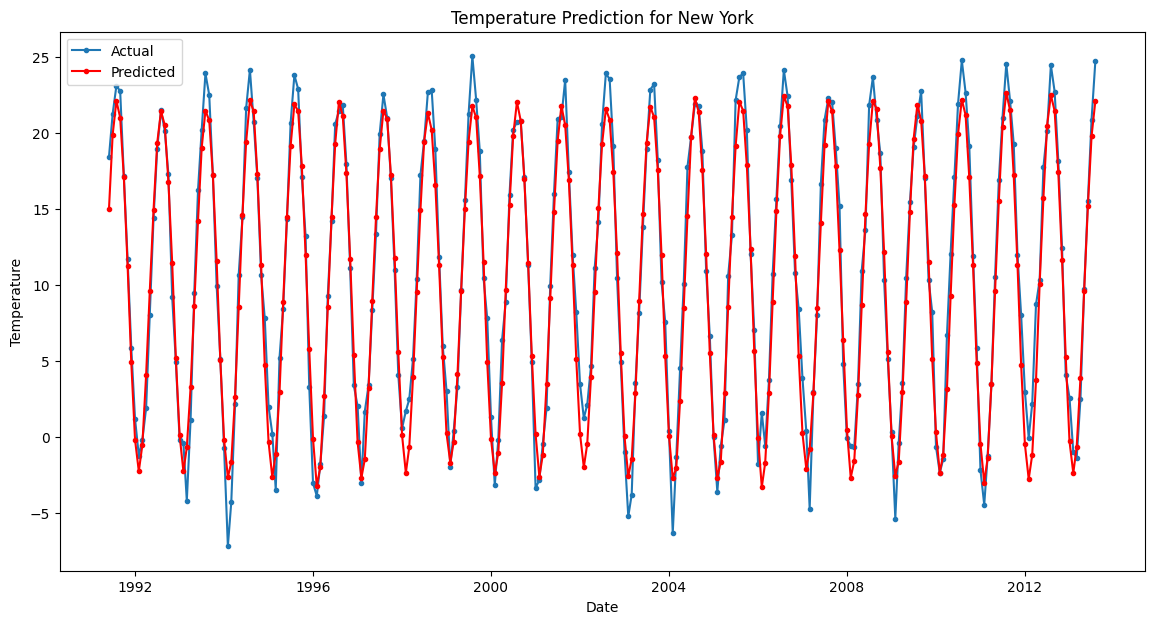

In [ ]:
# Making predictions
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Extract the corresponding date range for the test set predictions
test_dates = new_york_temp_df['dt'][train_size + time_steps + 1:]

# Visualizing the results
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test.flatten(), marker='.', label="Actual")
plt.plot(test_dates, predictions.flatten(), 'r', marker='.', label="Predicted")
plt.title("Temperature Prediction for New York")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [ ]:
# Prepare input data for prediction
last_time_steps_data = scaled_data[-time_steps:]
last_time_steps_data = last_time_steps_data.reshape((1, time_steps, 1))

# Make prediction using the trained model
predicted_temperature_scaled = model.predict(last_time_steps_data)

# Inverse transform the predicted temperature
predicted_temperature = scaler.inverse_transform(predicted_temperature_scaled)

# Get the date of the next month
last_date = new_york_temp_df["dt"].max()
next_date = pd.to_datetime(last_date) + pd.DateOffset(days=31)

# Print out the date and predicted temperature
print("Date of Next Month:", next_date)
print("Predicted Temperature for New York:", predicted_temperature[0][0], "°C")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Date of Next Month: 2013-09-01 00:00:00
Predicted Temperature for New York: 17.102028 °C


Display model 1 metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test.flatten(), predictions.flatten())
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test.flatten(), predictions.flatten())
r2 = r2_score(y_test.flatten(), predictions.flatten())

# Print the metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R squared: {r2}')


MSE: 3.0748714669271555
RMSE: 1.7535311422746833
MAE: 1.4119067359943969
R squared: 0.9621277774543422


Results:
* The predicted temperature on 2013-09-01 in New York is 17.102028°C, which is around 62.78 degrees Fahrenheit. In September, New York has an average high of 25°C and an average low of 16°C. 17.102028°C is on the low end of the average temperature of New York in September, so it is not the most accurate prediction. Predicting temperature can be volatile since temperature likes to rise and drop rather inconsistently, so we should be cautious with our results.
* MSE measures the average squared difference between the actual and predicted values. An MSE of 3.0748714669271555 is a small average squared difference, which is good.
* RMSE is the square root of the MSE, indicating how much error to expect on average in the predictions in units of temperature. An RMSE of 1.7535311422746833 is a small error on average in terms of degrees Celsius, which is good.
* MAE measures the average absolute difference between actual and predicted values. In this case, the predictions are about 1.41 degrees Celsius off from the actual temperatures.
* An R squared value of 0.96 indicates that around 96.2% of the variance in the temperature data is explained by the model.
* Overall, the low values of MSE, RMSE, MAE, and the high R squared suggests that the model performs well in predicting temperature trends in New York.

The neural network below is similar to the neural network above, but the one below does not utilize MinMaxScaler from sklearn. Both neural networks achieve similar results.

Define model 2

In [ ]:
# Filter the DataFrame for New York
new_york_df = weather_df_1900_onwards_filtered.filter(col("City") == "New York").select("dt", "AverageTemperature")

# Convert Spark DataFrame to Pandas DataFrame
new_york_pandas_df = new_york_df.toPandas()

# Prepare time series data
def prepare_data(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

look_back = 7  # Number of previous days to use for prediction
X, Y = prepare_data(new_york_pandas_df["AverageTemperature"].values, look_back)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
Y_train, Y_test = Y[:split_index], Y[split_index:]

# Reshape the data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the neural network model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")

Epoch 1/100


/databricks/python/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 155.9472
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 89.8891
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 76.4091
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 53.6595
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 27.1004
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 16.3532
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.1964
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.7727
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.9462
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.1867
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.7496
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.4398
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.6090
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.7007
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 

Make predictions

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


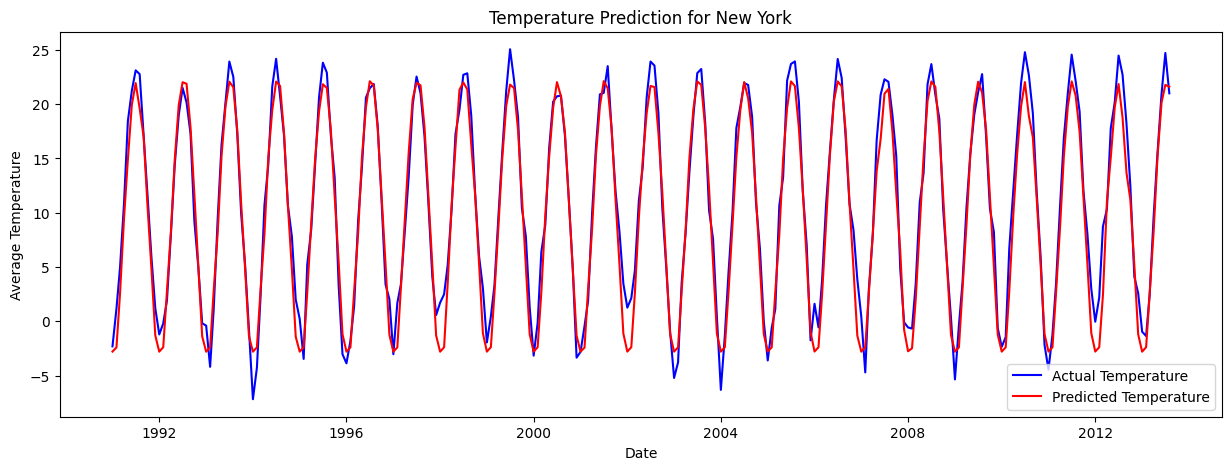

In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(new_york_pandas_df["dt"].values[split_index+look_back:], Y_test, color='blue', label='Actual Temperature')
plt.plot(new_york_pandas_df["dt"].values[split_index+look_back:], predictions, color='red', label='Predicted Temperature')
plt.title('Temperature Prediction for New York')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()

In [ ]:
# Make predictions for the next month's temperature
last_week_temperatures = new_york_pandas_df["AverageTemperature"].values[-look_back:].reshape(1, look_back, 1)
predicted_temperature = model.predict(last_week_temperatures)
print(f"Predicted Temperature for the Next Month: {predicted_temperature[0][0]}°C")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Temperature for the Next Month: 17.496232986450195°C


Display model 2 metrics

In [ ]:
# Calculate evaluation metrics
mse2 = mean_squared_error(Y_test, predictions)
rmse2 = np.sqrt(mse)
mae2 = mean_absolute_error(Y_test, predictions)
r2_2 = r2_score(Y_test, predictions)

print(f"MSE: {mse2}")
print(f"RMSE: {rmse2}")
print(f"MAE: {mae2}")
print(f"R²: {r2_2}")

MSE: 3.8414695274597173
RMSE: 1.7535311422746833
MAE: 1.576836638180649
R²: 0.9526725847005664


Results:
* The predicted temperature on 2013-09-01 in New York is 17.496°C, which is around 63.4928 degrees Fahrenheit. This is around the temperature also predicted by model 1. In September, New York has an average high of 25°C and an average low of 16°C. 17.496°C is on the low end of the average temperature of New York in September, so it is not the most accurate prediction. Predicting temperature can be volatile since temperature likes to rise and drop rather inconsistently, so we should be cautious with our results.
* MSE measures the average squared difference between the actual and predicted values. An MSE of 3.8414695274597173 is a small average squared difference, which is good.
* RMSE is the square root of the MSE, indicating how much error to expect on average in the predictions in units of temperature. An RMSE of 1.7535311422746833 is a small error on average in terms of degrees Celsius, which is good.
* MAE measures the average absolute difference between actual and predicted values. In this case, the predictions are about 1.58 degrees Celsius off from the actual temperatures.
* An R squared value of 0.95 indicates that around 95.3% of the variance in the temperature data is explained by the model.
* Overall, the low values of MSE, RMSE, MAE, and the high R squared suggests that the model performs well in predicting temperature trends in New York.

In [ ]:
from datetime import datetime, timedelta

# Get the last date in the dataset
last_date = new_york_pandas_df["dt"].max()

# Get the next month's date
next_day_date = last_date + timedelta(days=31)

# Print out the day of the prediction
print(f"Predicted Temperature for: {next_day_date}")

Predicted Temperature for: 2013-09-01


### 6. Conclusion
---
*(Briefly describe what you have done using cloud computing techniques and what you discovered. Discuss any shortcomings of the process and results. Propose future work. **Finally, discuss the lessons learned from doing the project**.)*

In summary, for this project we have used a variety of models, data processing, and data manipulation techniques within the Spark language. We also utilize the cloud computing capabilities of dataBricks to be able to work with the large climate change dataset. Through the results of our models, we found a slow increasing temperature trend from 1900-2013 with continuous gains in the future. The seasonal trends of temperatures also are a major factor in predicting temperatures, and our models were able to consistently predict these changes along with the general change in temperature.

Some limitations of our project came from the nature of our dataset. While the data set had temperature recordings dating back to the 1700s, there were many missing values in the older periods where there were many years without temperature recordings. Additionally, with the nature of our dataset being city specific some cities started recording temperature data later compared to others, so for the sake of even data weights across the cities we chose our oldest date to be 1900. While limiting this allowed us to deal with tens of thousands of less missing values and have consistent data for all the cities. The period before 1900 also had a much greater temperature change, which would have helped us visualize a more dramatic change, but there was just too much missing data.

Another result of the limitation in data was that initially we could not compare the changes in temperature between centuries. Ideally, we would have liked to be able to compared the rises in temperature from the 18th and 19th centuries to the 20th century. But our limitation meant that we only had the 20th century temperature, which rose very slowly. This confused us initially because from our background research the temperature changes should have been more dramatic, but it was because we were missing the past data that would have shown us a greater change.

For future work, one thing we would like to do is also show and predict the change in temperatures instead of just the future temperature. By having a model or process that gives us the change in temperatures we might be able to better analyze the changes in temperatures.



### 7. References

https://earthobservatory.nasa.gov/world-of-change/global-temperatures

https://dnr.wisconsin.gov/climatechange/science

https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/data


---
(*Use the following requirements for writing your reports. DO NOT DELETE THE CELLS BELLOW*)

# Project Requirements

This final project examines the level of knowledge the students have learned from the course. Course outcomes include querying and exploring data using higher-level tools built on top of a cloud computing platform, applying practical tools for processing massive data sets, and building scalable big data analytical and predictive models.

** Marking will be foucsed on both presentation and content.**

## Written Presentation Requirements
The report will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as its contents. Please make sure that the text of your report is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

## Technical Content of the Entire Project:
* Is the problem well defined and described thoroughly?
* Is the size and complexity of the data set used in this project commensurate with the course?
* Does the project uses cloud computing techniques for exploratory data analysis?
* Does the project uses cloud computing techniques for building analytical and predictive models?
* Does the project cover the key data science activites including data cleaning, data wrangling, visualization, model selection, feature engineering, and model evaluation?
* Does the report present the findings well and make clear conclusions?
* Overall, what is the rating of this project?

###### Technical Content of the Entire Project

1. The problem was well-defined and described thoroughly in the abstract and in the project proposal. We worked to solve the problem statement using different cloud computing techniques and by building and evaluating models.
2. Yes, the size and complexity of the dataset used in this project are commensurate with the course. I would say the size and complexity are greater than most of the datasets we used in the course. We narrowed the dataset down to make it easier to work with, but the full dataset was larger.
3. Yes, at the beginning of the project, different cloud computing techniques were used for exploratory analysis. They were also used in the project proposal submission as well.
4. Yes, this project uses cloud computing techniques for building analytical and predictive models. Some of the packages used for the cloud computing techniques include "pyspark.sql.functions," "pyspark.sql.window," "pyspark.ml.regression," and "pyspark.ml.feature."
5. Yes, the project covers the key data science activities including data cleaning, data wrangling, visualization, model selection, feature engineering, and model evaluation. We cleaned and wrangled the data at the beginning by dropping any missing values and ensuring all the data was in the correct format. We created visualizations to see the trends and the way the data was leaning. We selected different models such as linear and logistic regression. Along with that, we also created a neural network. Looking at the evaluation metrics, shown above in our file, our performance was pretty good for the linear regression models and the neural network. The logistic model didn't perform as well compared to the others but still did well.
6. Yes, the report presents the findings well and makes clear conclusions based on the data provided and the outputs of the models.
7. Overall, we would rate this project a success as we got to practice what we learned in class. We also think it was a success because our models performed relatively well. If we were to go back, we would try to use other models and see if that would change the results. We may also consider using the full dataset instead of just everything after 1900.